<a href="https://colab.research.google.com/github/svg0016/PythonProject/blob/main/AmazonStock4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#This program uses 

#Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


#Get the stock quote
df = web.DataReader('AMZN', data_source='yahoo', start='2018-01-02', end= '2020-12-21')

#Show the data
df



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995
...,...,...,...,...,...,...
2020-12-15,3188.500000,3130.489990,3181.010010,3165.120117,3323700,3165.120117
2020-12-16,3247.000000,3163.679932,3176.010010,3240.959961,4427600,3240.959961
2020-12-17,3263.510010,3221.000000,3250.000000,3236.080078,3474300,3236.080078


In [29]:
#Get the number of rows and colums in the data set
df.shape

(749, 6)

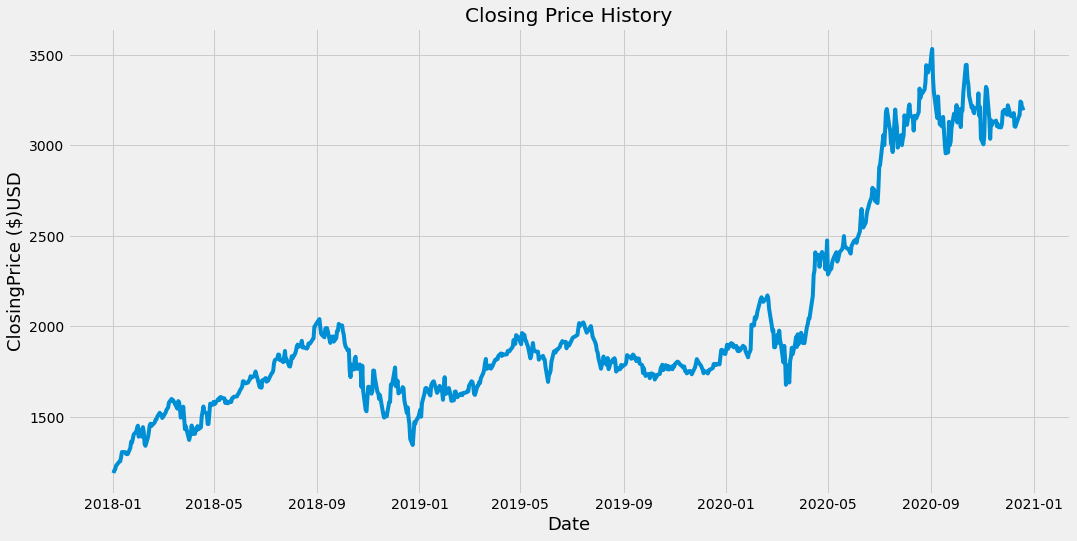

In [30]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize= 18)
plt.ylabel('ClosingPrice ($)USD', fontsize= 18)
plt.show()

In [31]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset)*.80 )

training_data_len

600

In [32]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00648467],
       [0.00878569],
       [0.01713171],
       [0.02470073],
       [0.02718957],
       [0.02788543],
       [0.03742681],
       [0.0496021 ],
       [0.04945697],
       [0.04524769],
       [0.04453046],
       [0.04506837],
       [0.05904102],
       [0.07408089],
       [0.07193354],
       [0.08065946],
       [0.09094792],
       [0.09762045],
       [0.10621828],
       [0.11179796],
       [0.08580369],
       [0.10285854],
       [0.08580369],
       [0.10836135],
       [0.09723623],
       [0.06894093],
       [0.06428765],
       [0.08419425],
       [0.09626714],
       [0.11186628],
       [0.11643842],
       [0.11085874],
       [0.11925171],
       [0.12547175],
       [0.12650483],
       [0.13276327],
       [0.14213382],
       [0.13787759],
       [0.13807822],
       [0.12996702],
       [0.13287   ],
       [0.1428425 ],
       [0.14883199],
       [0.15197401],
       [0.15490257],
       [0.16644184],
       [0.174

In [72]:
#Create the traiing data set
#Creat the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(70, len(train_data)):
    x_train.append(train_data[i-70:i, 0])
    y_train.append(train_data[i,0])

    if i<=71:
        print(x_train)
        print(y_train)
        print()


[array([0.        , 0.00648467, 0.00878569, 0.01713171, 0.02470073,
       0.02718957, 0.02788543, 0.03742681, 0.0496021 , 0.04945697,
       0.04524769, 0.04453046, 0.04506837, 0.05904102, 0.07408089,
       0.07193354, 0.08065946, 0.09094792, 0.09762045, 0.10621828,
       0.11179796, 0.08580369, 0.10285854, 0.08580369, 0.10836135,
       0.09723623, 0.06894093, 0.06428765, 0.08419425, 0.09626714,
       0.11186628, 0.11643842, 0.11085874, 0.11925171, 0.12547175,
       0.12650483, 0.13276327, 0.14213382, 0.13787759, 0.13807822,
       0.12996702, 0.13287   , 0.1428425 , 0.14883199, 0.15197401,
       0.15490257, 0.16644184, 0.17476649, 0.1704078 , 0.17161165,
       0.16790609, 0.16336387, 0.15194415, 0.16969485, 0.16770973,
       0.15193988, 0.13086784, 0.15661019, 0.13150392, 0.10348613,
       0.11028242, 0.07811512, 0.08667887, 0.09458511, 0.11216509,
       0.09230545, 0.09266831, 0.10553524, 0.10162055, 0.11077765])]
[0.1032171732658066]

[array([0.        , 0.00648467, 0.008

In [73]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
#x_test.shape[0] = number of rows
#x_test.shape[1] = number of columns/timestamps
#1 = number of features, close price

In [75]:
#Build the LSTM(Long Term Short Memory) model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [76]:
#Compile the model
model.compile(optimizer= 'adam', loss='mean_squared_error')


In [77]:
#Train the Model
model.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
53/53 [==============================] - 4s 34ms/step - loss: 0.0167
Epoch 2/100
53/53 [==============================] - 2s 34ms/step - loss: 0.0017
Epoch 3/100
53/53 [==============================] - 2s 35ms/step - loss: 9.4082e-04
Epoch 4/100
53/53 [==============================] - 2s 34ms/step - loss: 0.0011
Epoch 5/100
53/53 [==============================] - 2s 35ms/step - loss: 0.0010
Epoch 6/100
53/53 [==============================] - 2s 34ms/step - loss: 7.6818e-04
Epoch 7/100
53/53 [==============================] - 2s 35ms/step - loss: 8.5695e-04
Epoch 8/100
53/53 [==============================] - 2s 35ms/step - loss: 7.0495e-04
Epoch 9/100
53/53 [==============================] - 2s 34ms/step - loss: 7.1502e-04
Epoch 10/100
53/53 [==============================] - 2s 35ms/step - loss: 5.6204e-04
Epoch 11/100
53/53 [==============================] - 2s 35ms/step - loss: 6.0101e-04
Epoch 12/100
53/53 [==============================] - 2s 35ms/step - loss: 5.67

In [79]:
#Create the testing data set
#Create a new array conaining scaled values from index 748 997
test_data = scaled_data[training_data_len - 70: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(70, len(test_data)):
  x_test.append(test_data[i-70:i, 0])



In [80]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [81]:
#Reshape the Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#x_test.shape[0] = number of rows
#x_test.shape[1] = number of columns/timestamps
#1 = number of features, close price


In [82]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)#Unscaling the predictions


In [83]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean(predictions - y_test )**2)
rmse

8.857983889995806

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


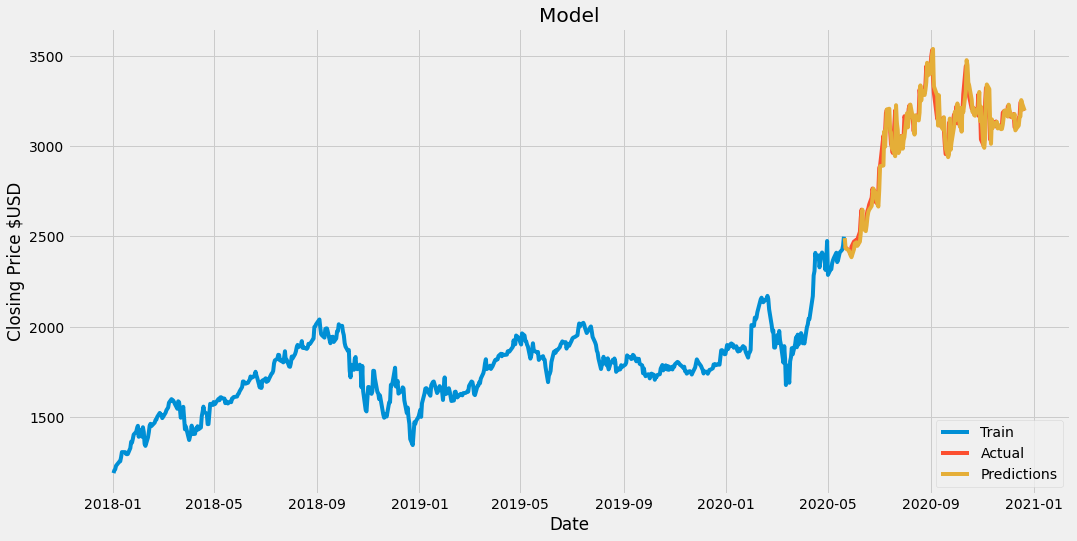

In [84]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Closing Price $USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Actual','Predictions'],loc= 'lower right' )
plt.show()

In [85]:
#Show the valid and predicted prices

valid


,Close,Predictions
Date,,
2020-05-21,2446.739990,2490.063721
2020-05-22,2436.879883,2434.199707
2020-05-26,2421.860107,2421.133057
2020-05-27,2410.389893,2405.512207
2020-05-28,2401.100098,2393.498779
...,...,...
2020-12-15,3165.120117,3159.979248
2020-12-16,3240.959961,3164.247070
2020-12-17,3236.080078,3253.921875


In [86]:
#Get the quote
amzn_quote = web.DataReader('AMZN', data_source='yahoo', start='2018-01-02', end='2020-12-21')
#Create a new dataframe
new_df = amzn_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[3205.6965]]


In [87]:
#Get Amazon Current value
amzn_quote2 = web.DataReader('AMZN', data_source='yahoo', start='2020-12-21', end='2020-12-21')
print(amzn_quote2['Close'])

Date
2020-12-21    3206.179932
Name: Close, dtype: float64
